Dataset Sample:
    age  income  loan_amount  credit_history  default
0   25   30000        10000               1        0
1   45   60000        20000               1        0
2   35   50000        15000               0        1
3   50   80000        25000               1        0
4   23   20000         8000               0        1

Accuracy: 1.0

Confusion Matrix:
 [[2 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


ROC-AUC Score: 1.0


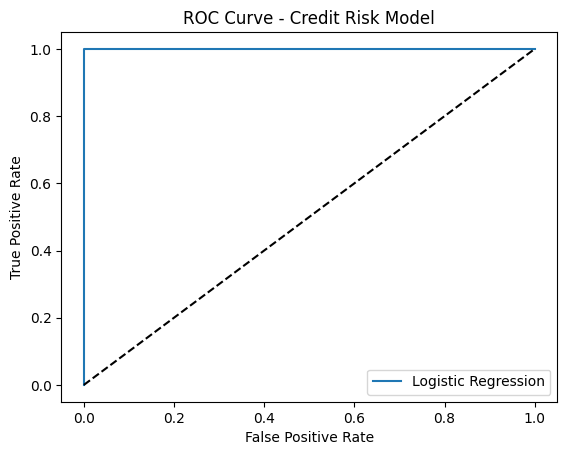

In [ ]:
# Credit Risk Modeling in Python

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 2. Load Dataset (Synthetic Example)
# Normally, you'd load from CSV using pd.read_csv("credit_data.csv")
data = {
    'age': [25, 45, 35, 50, 23, 40, 60, 48, 33, 55],
    'income': [30000, 60000, 50000, 80000, 20000, 70000, 90000, 75000, 40000, 85000],
    'loan_amount': [10000, 20000, 15000, 25000, 8000, 22000, 27000, 23000, 12000, 24000],
    'credit_history': [1, 1, 0, 1, 0, 1, 1, 0, 0, 1],  # 1 = good, 0 = bad
    'default': [0, 0, 1, 0, 1, 0, 0, 1, 1, 0]  # Target: 1 = default (bad), 0 = no default (good)
}
df = pd.DataFrame(data)

print("Dataset Sample:\n", df.head())

# 3. Define Features & Target
X = df.drop('default', axis=1)
y = df['default']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 7. Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

# 8. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

# 9. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Risk Model")
plt.legend()
plt.show()
